In [1]:
import json
import os
import matplotlib.pyplot as plt
import numpy as np
from qiskit_experiments.framework import (
    ExperimentData,
    ExperimentDecoder,
    ExperimentEncoder,
)
from qiskit_research.mzm_generation import KitaevHamiltonianAnalysis

In [2]:
# load data from local disk

filenames = [
    "2022-06-07T14:21:40.824201_ibm_washington_n6",
    "2022-06-07T18:08:27.973157_ibm_washington_n8",
    "2022-06-07T21:15:33.395150_ibm_washington_n10",
    "2022-06-08T18:04:56.647624_ibm_washington_n12",
]

# directory with test data, edit this as appropriate
basedir = "/Users/georgezhou/Documents/GitHub/qiskit-research/docs/mzm_generation"
# basedir = ""

data_raw = []
for file in filenames:
    with open(os.path.join(basedir, "data/ibm_washington", f"{file}.json")) as f:
        # this may raise an error from Qiskit Experiments but it should be safe to ignore
        data_raw.append(json.load(f, cls=ExperimentDecoder))

/Users/georgezhou/miniforge3/envs/DDResearch/lib/python3.9/site-packages/qiskit_experiments/framework/json.py:584: UserWarning: Could not deserialize instance of class <class 'qiskit.providers.ibmq.accountprovider.AccountProvider'> from settings {}. 
The following exception was raised:
Traceback (most recent call last):
  File "/Users/georgezhou/miniforge3/envs/DDResearch/lib/python3.9/site-packages/qiskit_experiments/framework/json.py", line 338, in _deserialize_object
    return cls(**settings)
TypeError: __init__() missing 2 required positional arguments: 'credentials' and 'factory'

  return _deserialize_object(obj_val)
/Users/georgezhou/miniforge3/envs/DDResearch/lib/python3.9/site-packages/qiskit_experiments/framework/json.py:584: UserWarning: Could not deserialize instance of class <class 'qiskit_research.mzm_generation.experiment.KitaevHamiltonianExperiment'> from value ExperimentConfig(cls=<class 'qiskit_research.mzm_generation.experiment.KitaevHamiltonianExperiment'>, args=[{

In [4]:
filename = "2022-06-17T09:59:25.718669_ibm_washington_n12"

basedir = "/Users/georgezhou/Documents/GitHub/qiskit-research/docs/mzm_generation"

with open(os.path.join(basedir, "data/ibm_washington", f"{filename}.json")) as f:
    # this may raise an error from Qiskit Experiments but it should be safe to ignore
    data_raw.append(json.load(f, cls=ExperimentDecoder))

/Users/georgezhou/miniforge3/envs/DDResearch/lib/python3.9/site-packages/qiskit_experiments/framework/json.py:584: UserWarning: Could not deserialize instance of class <class 'qiskit.providers.ibmq.accountprovider.AccountProvider'> from settings {}. 
The following exception was raised:
Traceback (most recent call last):
  File "/Users/georgezhou/miniforge3/envs/DDResearch/lib/python3.9/site-packages/qiskit_experiments/framework/json.py", line 338, in _deserialize_object
    return cls(**settings)
TypeError: __init__() missing 2 required positional arguments: 'credentials' and 'factory'

  return _deserialize_object(obj_val)
/Users/georgezhou/miniforge3/envs/DDResearch/lib/python3.9/site-packages/qiskit_experiments/framework/json.py:584: UserWarning: Could not deserialize instance of class <class 'qiskit_research.mzm_generation.experiment.KitaevHamiltonianExperiment'> from value ExperimentConfig(cls=<class 'qiskit_research.mzm_generation.experiment.KitaevHamiltonianExperiment'>, args=[{

In [30]:
print(len(data_raw))

5


In [3]:
%%time
# run analysis
analysis = KitaevHamiltonianAnalysis()
data_list = []
i=0
for experiment_data in data_raw:
    data = analysis.run(experiment_data, replace_results=True)
    data.block_for_results()
    data_list.append(data)
    print(i)

/Users/georgezhou/miniforge3/envs/DDResearch/lib/python3.9/site-packages/numpy/linalg/linalg.py:2146: RuntimeWarning: divide by zero encountered in det
  r = _umath_linalg.det(a, signature=signature)
/Users/georgezhou/miniforge3/envs/DDResearch/lib/python3.9/site-packages/numpy/linalg/linalg.py:2146: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)
/Users/georgezhou/Documents/GitHub/qiskit-research/qiskit_research/mzm_generation/utils.py:114: UserWarning: The default value for `display_format` will be changed from 'dense' to 'sparse' in version 0.3.0. Once that happens, you must specify display_format='dense' directly.
  return FermionicOp(f"-_{index}") + FermionicOp(f"+_{index}")


0
0
0
0
CPU times: user 19h 10min 54s, sys: 6min 50s, total: 19h 17min 45s
Wall time: 7h 4min 18s


In [5]:
data = analysis.run(data_raw[-1], replace_results=True)
data.block_for_results()
data_list.append(data)

In [32]:
import pickle

pickle.dump(data_list, open('washington.p', 'wb'))

In [6]:
params = []
fidelity_witness_avg = []
energy_exact = []
energy = []
energy_error = []
bdg_energy_exact = []
bdg_energy = []
edge_correlation_exact = []
edge_correlation = []
number_exact = []
number = []
parity_exact = []
parity = []
site_correlation_exact = []
site_correlation = []
for data in data_list:
    params.append(data.metadata["params"])

# load results
    fidelity_witness_avg.append(data.analysis_results("fidelity_witness_avg").value)
    energy_exact.append(data.analysis_results("energy_exact").value)
    energy.append(data.analysis_results("energy").value)
    energy_error.append(data.analysis_results("energy_error").value)
    bdg_energy_exact.append(data.analysis_results("bdg_energy_exact").value)
    bdg_energy.append(data.analysis_results("bdg_energy").value)
    edge_correlation_exact.append(data.analysis_results("edge_correlation_exact").value)
    edge_correlation.append(data.analysis_results("edge_correlation").value)
    number_exact.append(data.analysis_results("number_exact").value)
    number.append(data.analysis_results("number").value)
    parity_exact.append(data.analysis_results("parity_exact").value)
    parity.append(data.analysis_results("parity").value)
    site_correlation_exact.append(data.analysis_results("site_correlation_exact").value)
    site_correlation.append(data.analysis_results("site_correlation").value)

# create plot directory
PLOT_DIR = f"plots/Washington_n_experiment"
os.makedirs(PLOT_DIR, exist_ok=True)

# set plot options
dpi = 150
filetype = "pdf"

print(params)

[KitaevHamiltonianExperimentParameters(timestamp='2022-06-07T14:21:40.824201', backend_name='ibm_washington', qubits=[108, 107, 106, 93, 87, 88], n_modes=6, tunneling_values=[-1.0], superconducting_values=[1.0], chemical_potential_values=[0.0, 0.75, 1.5, 2.25, 3.0], occupied_orbitals_list=[(), (0, 1, 2, 3, 4, 5), (0,), (1, 2, 3, 4, 5), (1,), (0, 2, 3, 4, 5)], dynamical_decoupling_sequences=[None, 'X2pm', 'XY4pm', 'XY8pm'], num_dd_passes=1, uhrig_spacing=False, concat_layers=1, pulse_scaling=False, num_twirled_circuits=0, seed=11364, basedir=None), KitaevHamiltonianExperimentParameters(timestamp='2022-06-07T18:08:27.973157', backend_name='ibm_washington', qubits=[28, 29, 30, 31, 32, 36, 51, 50], n_modes=8, tunneling_values=[-1.0], superconducting_values=[1.0], chemical_potential_values=[0.0, 0.75, 1.5, 2.25, 3.0], occupied_orbitals_list=[(), (0, 1, 2, 3, 4, 5, 6, 7), (0,), (1, 2, 3, 4, 5, 6, 7), (1,), (0, 2, 3, 4, 5, 6, 7)], dynamical_decoupling_sequences=[None, 'X2pm', 'XY4pm', 'XY8pm'

In [35]:
# data_raw.remove(data_raw[-1])

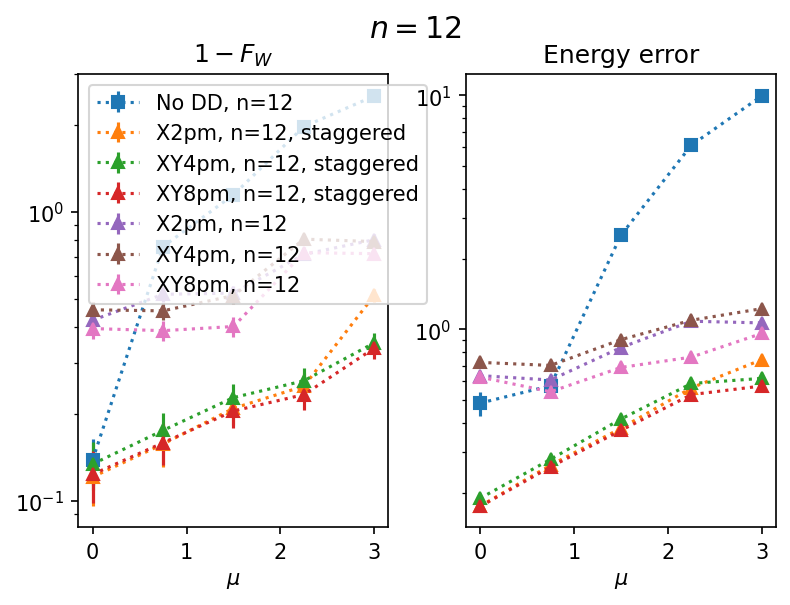

In [33]:
dd_sequences = ["X2pm", 'XY4pm', 'XY8pm']
fig, (ax1, ax2) = plt.subplots(1, 2, dpi=dpi)
fig.subplots_adjust(wspace=0.25)

i=-2

values, stddev = fidelity_witness_avg[-1][None]["pur"]
ax1.errorbar(
    params[i].chemical_potential_values,
    1 - values,
    yerr=2 * stddev,
    fmt="s:",
    label=f"No DD, n={params[-1].n_modes}",
)


for dd_sequence in dd_sequences:
    values, stddev = fidelity_witness_avg[-1][dd_sequence]["pur"]
    ax1.errorbar(
        params[i].chemical_potential_values,
        1 - values,
        yerr=2 * stddev,
        fmt="^:",
        label=f"{dd_sequence}, n={params[-1].n_modes}, staggered",
    )

for dd_sequence in dd_sequences:
    values, stddev = fidelity_witness_avg[-2][dd_sequence]["pur"]
    ax1.errorbar(
        params[i].chemical_potential_values,
        1 - values,
        yerr=2 * stddev,
        fmt="^:",
        label=f"{dd_sequence}, n={params[-2].n_modes}",
    )

values, stddev, percent_error = energy_error[-2][None]["pur"]
ax2.errorbar(
    params[i].chemical_potential_values,
    values,
    # percent_error * 100,
    yerr=2 * stddev,
    fmt="s:",
    label=f"No DD, n={params[-1].n_modes}",
)


ax1.set_xlabel(r"$\mu$")
ax1.set_title(r"$1 - F_W$")
ax1.set_yscale("log")
# ax1.set_ylim(1e-2, 10)

for dd_sequence in dd_sequences:
    values, stddev, percent_error = energy_error[-1][dd_sequence]["pur"]
    ax2.errorbar(
        params[i].chemical_potential_values,
        values,
        # percent_error * 100,
        # yerr=2 * stddev,
        fmt="^:",
        label=f"{dd_sequence}, n={params[-1].n_modes}, staggered",
    )

for dd_sequence in dd_sequences:
    values, stddev, percent_error = energy_error[-2][dd_sequence]["pur"]
    ax2.errorbar(
        params[i].chemical_potential_values,
        values,
        # percent_error * 100,
        # yerr=2 * stddev,
        fmt="^:",
        label=f"{dd_sequence}, n={params[-2].n_modes}",
    )

ax2.set_xlabel(r"$\mu$")
ax2.set_title(r"Energy error")
ax2.set_yscale("log")
# ax2.set_ylim(0, 10)
ax1.legend(loc="upper left")
fig.suptitle(
    rf"$n = {params[i].n_modes}$",
    size="x-large",
    # y=0.02
)

data.add_figures(fig, "fidelity_witness_dd", overwrite=True)
plt.savefig(f"{PLOT_DIR}/fidelity_witness_dd_compare_n{params[i].n_modes}.{filetype}")
plt.show()